In [226]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn import linear_model, preprocessing 
import warnings

In [227]:
survey = pd.read_csv('/Users/danielle.arneson/Desktop/70721survey.csv')
clients = pd.read_csv('/Users/danielle.arneson/Desktop/clients.csv')
programs = pd.read_csv('/Users/danielle.arneson/Desktop/goals2021.csv')

In [228]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5794 entries, 0 to 5793
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User Progress Id              5794 non-null   int64  
 1   Survey Id                     5794 non-null   int64  
 2   Survey Title                  5794 non-null   object 
 3   Language                      0 non-null      float64
 4   Mode                          5344 non-null   object 
 5   Wave Start Date               5794 non-null   object 
 6   Wave End Date                 5794 non-null   object 
 7   Status                        5794 non-null   object 
 8   Participant Id                0 non-null      float64
 9   Publish Id                    5794 non-null   int64  
 10  Instance                      5794 non-null   int64  
 11  User Id                       5794 non-null   int64  
 12  Contact Id                    5794 non-null   object 
 13  Ext

In [229]:
survey.head(10)

,User Progress Id,Survey Id,Survey Title,Language,Mode,Wave Start Date,Wave End Date,Status,Participant Id,Publish Id,...,Employer Id,Start Date Time Stamp,End Date Time Stamp,CoachingConfidence,CoachingMotivation,CMLFlourishOverallSatisfied,CMLFlourishHappy,CoachingHabitsGoalsAlignment,CoachingSatisfaction,CoachingFeedback
0,3021429,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,100845,2021-01-28 19:22:12,2021-01-28 21:24:49,10.0,10.0,5.0,5.0,Neutral,Very Satisfied,NaN
1,3021716,1616,1:1 Coaching survey,NaN,NaN,2021-01-28 08:00:00,2051-01-28 08:00:00,Incomplete,NaN,1616,...,NaN,2021-01-28 19:57:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3021859,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,Strongly Agree,Very Satisfied,Helpful and pleasant. Meets me where I am to ...
3,3021984,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,Agree,Satisfied,No Thank you
4,3022251,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach has help me build my confidence in ac...
5,3022282,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach is very knowledgeable about health is...
6,3022315,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Incomplete,NaN,1616,...,100845,2021-01-28 21:24:53,NaN,5.0,5.0,5.0,6.0,Agree,Neutral,NaN
7,3022444,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,Agree,Satisfied,No
8,3022571,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,106914,2021-01-28 22:11:28,2021-01-28 22:12:27,6.0,7.0,4.0,3.0,Neutral,Satisfied,NaN
9,3022663,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,CCHMC,2021-01-28 22:29:21,2021-01-28 22:30:13,9.0,8.0,8.0,8.0,Agree,Satisfied,"no, thank you!"


In [230]:
#data cleaning 
survey.columns = survey.columns.str.lower()
survey.columns = survey.columns.str.replace(" ","_")
survey['coachinghabitsgoalsalignment'] = survey['coachinghabitsgoalsalignment'].str.lower()
survey['coachingsatisfaction'] = survey['coachingsatisfaction'].str.lower()
survey['coachinghabitsgoalsalignment'] = survey['coachinghabitsgoalsalignment'].str.replace(" ","_")
survey['coachingsatisfaction'] = survey['coachingsatisfaction'].str.replace(" ", "_")
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5794 entries, 0 to 5793
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_progress_id              5794 non-null   int64  
 1   survey_id                     5794 non-null   int64  
 2   survey_title                  5794 non-null   object 
 3   language                      0 non-null      float64
 4   mode                          5344 non-null   object 
 5   wave_start_date               5794 non-null   object 
 6   wave_end_date                 5794 non-null   object 
 7   status                        5794 non-null   object 
 8   participant_id                0 non-null      float64
 9   publish_id                    5794 non-null   int64  
 10  instance                      5794 non-null   int64  
 11  user_id                       5794 non-null   int64  
 12  contact_id                    5794 non-null   object 
 13  ext

In [231]:
survey = survey.drop(columns =['language', 'participant_id', 'wave_start_date', 'wave_end_date', 'mode', 'instance','user_id','user_progress_id']) #remove columns that aren't useful
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5794 entries, 0 to 5793
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   survey_id                     5794 non-null   int64  
 1   survey_title                  5794 non-null   object 
 2   status                        5794 non-null   object 
 3   publish_id                    5794 non-null   int64  
 4   contact_id                    5794 non-null   object 
 5   external_participant_id       5793 non-null   object 
 6   employer_id                   1565 non-null   object 
 7   start_date_time_stamp         5794 non-null   object 
 8   end_date_time_stamp           5325 non-null   object 
 9   coachingconfidence            5344 non-null   float64
 10  coachingmotivation            5338 non-null   float64
 11  cmlflourishoverallsatisfied   5336 non-null   float64
 12  cmlflourishhappy              5336 non-null   float64
 13  coa

In [232]:
survey['status'].unique()

array(['Completed', 'Incomplete'], dtype=object)

In [233]:
survey = survey.drop(survey[survey.status == 'Incomplete'].index) #removed all incomplete surveys 

In [234]:
survey['status'].replace('Completed','1',inplace=True)#changed all completed surveys to 1

In [235]:
survey['status'] = survey['status'].astype(str).astype(int)

In [236]:
survey['status'].unique()

array([1])

In [237]:
survey = survey[(~survey['contact_id'].str.contains('test'))] #dropping all test contacts 

In [238]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5324 entries, 2 to 5792
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   survey_id                     5324 non-null   int64  
 1   survey_title                  5324 non-null   object 
 2   status                        5324 non-null   int64  
 3   publish_id                    5324 non-null   int64  
 4   contact_id                    5324 non-null   object 
 5   external_participant_id       5324 non-null   object 
 6   employer_id                   1560 non-null   object 
 7   start_date_time_stamp         5324 non-null   object 
 8   end_date_time_stamp           5324 non-null   object 
 9   coachingconfidence            5324 non-null   float64
 10  coachingmotivation            5324 non-null   float64
 11  cmlflourishoverallsatisfied   5324 non-null   float64
 12  cmlflourishhappy              5324 non-null   float64
 13  coa

In [239]:
survey.head(10)

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No
8,1616,1:1 Coaching survey,1,1616,0035Y00003kT5WzQAK,27fd15b6-e0ff-410e-a470-7cb65699865e,106914,2021-01-28 22:11:28,2021-01-28 22:12:27,6.0,7.0,4.0,3.0,neutral,satisfied,NaN
9,1616,1:1 Coaching survey,1,1616,0035Y00003kScSsQAK,3e09e650-6de1-4373-8d56-dd9c60339c8d,CCHMC,2021-01-28 22:29:21,2021-01-28 22:30:13,9.0,8.0,8.0,8.0,agree,satisfied,"no, thank you!"
10,1616,1:1 Coaching survey,1,1616,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,Vericast,2021-01-28 23:34:53,2021-01-29 00:06:30,10.0,10.0,9.0,10.0,agree,very_satisfied,Looking forward to the sessions and what we ca...
11,1616,1:1 Coaching survey,1,1616,0031O00003Yat8LQAR,5e3cc42f-a6b2-79bd-0be1-38cb2e30a498,dawn_food_products,2021-01-28 23:53:22,2021-01-28 23:54:37,7.0,7.0,6.0,4.0,neutral,very_satisfied,NaN
12,1616,1:1 Coaching survey,1,1616,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,Vericast,2021-01-29 00:06:41,2021-01-29 00:09:57,10.0,10.0,9.0,10.0,agree,very_satisfied,NaN


In [240]:
survey['publish_id'].unique() #checking to make sure all survey data collected is for the 1:1 survey 

array([1616])

In [241]:
survey['confidencedifference']=survey.sort_values('external_participant_id').groupby('external_participant_id')['coachingconfidence'].diff()
survey

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-1.0
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,1616,1:1 Coaching survey,1,1616,00339000029qWKHAA2,48958cd2-263b-4652-a6d6-93dae1293b72,NaN,2021-07-07 13:53:33,2021-07-07 13:54:50,7.0,8.0,8.0,9.0,neutral,satisfied,go,NaN
5789,1616,1:1 Coaching survey,1,1616,00339000029qWKHAA2,48958cd2-263b-4652-a6d6-93dae1293b72,NaN,2021-07-07 14:02:27,2021-07-07 14:03:13,8.0,8.0,9.0,7.0,neutral,neutral,go,1.0
5790,1616,1:1 Coaching survey,1,1616,0035Y00003z4NtlQAE,84c9b68d-3cb4-4696-9161-8c7f3f66522d,NaN,2021-07-07 14:33:10,2021-07-07 14:34:53,7.0,8.0,6.0,7.0,agree,very_satisfied,It was helpful to me to express my thoughts an...,NaN
5791,1616,1:1 Coaching survey,1,1616,0035Y00003z363vQAA,09f26172-c695-417b-908e-bd2492877214,NaN,2021-07-07 14:43:15,2021-07-07 14:44:18,10.0,10.0,8.0,8.0,strongly_agree,very_satisfied,Ramona is a very nice lady. She speaks clearly...,0.0


In [242]:
survey['confidencedifference'].mean()

0.0012623074981065387

In [243]:
survey['motivationdifference']=survey.sort_values('external_participant_id').groupby('external_participant_id')['coachingmotivation'].diff()
survey

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-1.0,-1.0
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,1616,1:1 Coaching survey,1,1616,00339000029qWKHAA2,48958cd2-263b-4652-a6d6-93dae1293b72,NaN,2021-07-07 13:53:33,2021-07-07 13:54:50,7.0,8.0,8.0,9.0,neutral,satisfied,go,NaN,NaN
5789,1616,1:1 Coaching survey,1,1616,00339000029qWKHAA2,48958cd2-263b-4652-a6d6-93dae1293b72,NaN,2021-07-07 14:02:27,2021-07-07 14:03:13,8.0,8.0,9.0,7.0,neutral,neutral,go,1.0,0.0
5790,1616,1:1 Coaching survey,1,1616,0035Y00003z4NtlQAE,84c9b68d-3cb4-4696-9161-8c7f3f66522d,NaN,2021-07-07 14:33:10,2021-07-07 14:34:53,7.0,8.0,6.0,7.0,agree,very_satisfied,It was helpful to me to express my thoughts an...,NaN,NaN
5791,1616,1:1 Coaching survey,1,1616,0035Y00003z363vQAA,09f26172-c695-417b-908e-bd2492877214,NaN,2021-07-07 14:43:15,2021-07-07 14:44:18,10.0,10.0,8.0,8.0,strongly_agree,very_satisfied,Ramona is a very nice lady. She speaks clearly...,0.0,0.0


In [244]:
survey['motivationdifference'].mean()

0.0012623074981065387

In [245]:
survey['employer_id'].unique()

array(['CCHMC', 'TeamHealth', 'allegion', '108854', '106914', 'Vericast',
       'dawn_food_products', 'Sprouts', '107382', 'assurant', '106840',
       'mccain_foods_usa', '6fdcac65-c386-499d-a7b8-3bc8c1b6f9ca', 'APS',
       '108177', '108199', '108540', 'AmericanAirlines', 'StrykerStrive',
       '6b6f26df-eaec-453f-b391-fe8621faec28', '107144', 'PSE', 'ABB',
       '106043', '107736', 'AllyFinancial', '107387', 'honda', 'UNC-HCS',
       'Kindred', 'KindredAtHome', 'd0dce4a6-6059-498e-b235-e6052231942a',
       '107771', '473ff432-4afd-48fa-ab94-da73543b6b0b', 'maximus_inc',
       'Bayer', 'NorthwesternMutual', 'boardofpensions',
       'association_of_washington_cities', '106960',
       'c97c6d49-f047-49b1-a3a4-f04a08d5a492',
       '5ecba2bc-c88b-4beb-a767-a053e9480b98', '107386', '109000',
       '106682', 'synopsys', '108880', '107244',
       'ad1d7260-2c17-4409-946f-25adacaab544', 'Mallinckrodt',
       'UnitedBioSource', 'c9c967ec-0304-4c49-946e-a7df431d5223',
       '1071

In [246]:
survey[['start_date_time_stamp', 'end_date_time_stamp']].describe()

,start_date_time_stamp,end_date_time_stamp
count,5324,5324
unique,5320,5322
top,2021-03-29 22:12:14,2021-06-29 16:45:08
freq,2,2


In [247]:
survey['start_date_time_stamp'] = pd.to_datetime(survey['start_date_time_stamp'])

In [248]:
survey['end_date_time_stamp'] = pd.to_datetime(survey['end_date_time_stamp'])

In [249]:
survey['completion_time'] = survey['end_date_time_stamp'] - survey['start_date_time_stamp']

In [250]:
survey.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-1.0,-1.0,00:00:33
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,00:03:57
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,00:05:46
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,NaN,NaN,00:00:36


In [251]:
survey['completion_time'].mean() #average duration to complete survey

Timedelta('0 days 03:38:12.396882')

In [252]:
survey['completion_time'].max() #longest duration to complete survey

Timedelta('62 days 23:10:31')

In [253]:
survey['completion_time'].min()# shortest duration to complete survey

Timedelta('0 days 00:00:14')

In [254]:
survey['coachingconfidence'].unique()

array([ 8., 10.,  6.,  9.,  7.,  4.,  5.,  3.,  2.,  1.])

In [255]:
survey['coachingconfidence'].describe()

count    5324.000000
mean        8.751690
std         1.301001
min         1.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: coachingconfidence, dtype: float64

In [256]:
survey['coachingmotivation'].unique()

array([ 8., 10.,  7.,  9.,  5.,  6.,  4.,  3.])

In [257]:
survey['coachingmotivation'].describe()

count    5324.000000
mean        8.898573
std         1.261671
min         3.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: coachingmotivation, dtype: float64

In [258]:
survey['coachinghabitsgoalsalignment'].unique()

array(['strongly_agree', 'agree', 'neutral', 'strongly_disagree',
       'disagree'], dtype=object)

In [259]:
survey['coachinghabitsgoalsalignment'].describe()

count      5324
unique        5
top       agree
freq       2833
Name: coachinghabitsgoalsalignment, dtype: object

In [260]:
survey['cmlflourishoverallsatisfied'].describe()

count    5324.000000
mean        8.280804
std         1.555969
min         0.000000
25%         7.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: cmlflourishoverallsatisfied, dtype: float64

In [261]:
Habits = survey[(survey['coachinghabitsgoalsalignment'].str.contains('disagree'))]

In [262]:
Habits.head(20)

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
41,1616,1:1 Coaching survey,1,1616,00339000027ctYkAAI,42e252a0-53c7-4f89-9c6a-29cbfbab51eb,ABB,2021-01-29 23:05:39,2021-01-29 23:07:07,10.0,10.0,10.0,10.0,strongly_disagree,very_satisfied,None,0.0,0.0,0 days 00:01:28
46,1616,1:1 Coaching survey,1,1616,0037000001kLLFEAA4,31855b43-5c29-4365-84df-07734da5557c,107387,2021-01-30 00:37:56,2021-01-30 00:38:32,10.0,10.0,10.0,10.0,strongly_disagree,very_satisfied,NaN,0.0,0.0,0 days 00:00:36
62,1616,1:1 Coaching survey,1,1616,0035Y00003kUqITQA0,c1b8035d-a394-454b-a65a-0e560aed5766,maximus_inc,2021-02-01 17:04:48,2021-02-01 17:05:49,9.0,10.0,8.0,7.0,disagree,very_satisfied,Not at this time.,NaN,NaN,0 days 00:01:01
78,1616,1:1 Coaching survey,1,1616,0031O00003YYurCQAT,0c4780ed-7552-49ee-9e9d-10c3583dbb23,NorthwesternMutual,2021-02-01 22:00:52,2021-02-01 22:02:13,10.0,10.0,2.0,1.0,strongly_disagree,very_satisfied,NaN,NaN,NaN,0 days 00:01:21
80,1616,1:1 Coaching survey,1,1616,0035Y00003kUoDUQA0,0a18f4db-06f6-658b-8f4d-8751787955e3,allegion,2021-02-01 22:56:22,2021-02-01 22:57:58,7.0,9.0,8.0,8.0,disagree,very_satisfied,NaN,NaN,NaN,0 days 00:01:36
82,1616,1:1 Coaching survey,1,1616,0031O00003Yb7jUQAR,b1bbe49f-ac22-41cc-8f8b-2eff652a0b6d,107382,2021-02-01 23:20:16,2021-02-01 23:23:08,10.0,10.0,9.0,9.0,disagree,very_satisfied,Very positive experience. I look forward to ou...,NaN,NaN,0 days 00:02:52
89,1616,1:1 Coaching survey,1,1616,0035Y00003kUoe0QAC,f59330ed-1218-47c4-b5a9-6bd8b29b5a0f,maximus_inc,2021-02-02 03:23:32,2021-02-02 03:24:50,10.0,8.0,6.0,5.0,disagree,very_satisfied,NaN,0.0,0.0,0 days 00:01:18
98,1616,1:1 Coaching survey,1,1616,0035Y00003kUFBpQAO,6d7d3012-593c-42c6-8d44-1eed3cde1b59,d0dce4a6-6059-498e-b235-e6052231942a,2021-02-02 15:37:45,2021-02-02 15:39:50,9.0,9.0,7.0,9.0,disagree,very_satisfied,looking forward to be held accountable to my a...,0.0,0.0,0 days 00:02:05
133,1616,1:1 Coaching survey,1,1616,0035Y00003kTxjIQAS,046ef8a0-b06e-4035-b4ca-f04f7f584fdf,PSE,2021-02-02 21:05:38,2021-02-02 21:06:04,10.0,6.0,3.0,3.0,disagree,satisfied,NaN,4.0,-2.0,0 days 00:00:26
170,1616,1:1 Coaching survey,1,1616,0031O00003cFlaVQAS,5c25eb35-b52e-4c45-8d65-05b0c9a56d86,109000,2021-02-03 18:53:54,2021-02-03 18:55:39,10.0,10.0,6.0,6.0,disagree,very_satisfied,Already I see that this will be helpful.,NaN,NaN,0 days 00:01:45


In [263]:
Habits.info() # number of surveys that have disagree or strongly disagree with habit and goal alignment 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 41 to 5734
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     269 non-null    int64          
 1   survey_title                  269 non-null    object         
 2   status                        269 non-null    int64          
 3   publish_id                    269 non-null    int64          
 4   contact_id                    269 non-null    object         
 5   external_participant_id       269 non-null    object         
 6   employer_id                   85 non-null     object         
 7   start_date_time_stamp         269 non-null    datetime64[ns] 
 8   end_date_time_stamp           269 non-null    datetime64[ns] 
 9   coachingconfidence            269 non-null    float64        
 10  coachingmotivation            269 non-null    float64        
 11  cmlflourishoveral

In [264]:
survey['cmlflourishhappy'].unique()

array([ 8., 10.,  9.,  3.,  4.,  7.,  6.,  5.,  0.,  1.,  2.])

In [265]:
survey.dropna(subset = ["cmlflourishhappy"])

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-1.0,-1.0,00:00:33
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,00:03:57
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,00:05:46
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,NaN,NaN,00:00:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,1616,1:1 Coaching survey,1,1616,00339000029qWKHAA2,48958cd2-263b-4652-a6d6-93dae1293b72,NaN,2021-07-07 13:53:33,2021-07-07 13:54:50,7.0,8.0,8.0,9.0,neutral,satisfied,go,NaN,NaN,00:01:17
5789,1616,1:1 Coaching survey,1,1616,00339000029qWKHAA2,48958cd2-263b-4652-a6d6-93dae1293b72,NaN,2021-07-07 14:02:27,2021-07-07 14:03:13,8.0,8.0,9.0,7.0,neutral,neutral,go,1.0,0.0,00:00:46
5790,1616,1:1 Coaching survey,1,1616,0035Y00003z4NtlQAE,84c9b68d-3cb4-4696-9161-8c7f3f66522d,NaN,2021-07-07 14:33:10,2021-07-07 14:34:53,7.0,8.0,6.0,7.0,agree,very_satisfied,It was helpful to me to express my thoughts an...,NaN,NaN,00:01:43
5791,1616,1:1 Coaching survey,1,1616,0035Y00003z363vQAA,09f26172-c695-417b-908e-bd2492877214,NaN,2021-07-07 14:43:15,2021-07-07 14:44:18,10.0,10.0,8.0,8.0,strongly_agree,very_satisfied,Ramona is a very nice lady. She speaks clearly...,0.0,0.0,00:01:03


In [266]:
survey['cmlflourishhappy'].unique()

array([ 8., 10.,  9.,  3.,  4.,  7.,  6.,  5.,  0.,  1.,  2.])

In [267]:
survey['cmlflourishhappy'].describe()

count    5324.000000
mean        7.975958
std         1.674359
min         0.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: cmlflourishhappy, dtype: float64

In [268]:
happy = survey[survey['cmlflourishhappy']<2.0]

In [269]:
happy.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
39,1616,1:1 Coaching survey,1,1616,0033900002KGbPAAA1,0d6b9602-ca31-44ca-af62-33810ef81831,assurant,2021-01-29 22:38:23,2021-01-29 22:39:18,10.0,10.0,9.0,0.0,strongly_agree,very_satisfied,No. Jackson is a great fit as a coach.,0.0,0.0,00:00:55
78,1616,1:1 Coaching survey,1,1616,0031O00003YYurCQAT,0c4780ed-7552-49ee-9e9d-10c3583dbb23,NorthwesternMutual,2021-02-01 22:00:52,2021-02-01 22:02:13,10.0,10.0,2.0,1.0,strongly_disagree,very_satisfied,NaN,NaN,NaN,00:01:21
238,1616,1:1 Coaching survey,1,1616,0033900002KDmWiAAL,de88fe49-ddb0-44f1-9a95-7e321bf6a1aa,108199,2021-02-05 01:18:13,2021-02-05 01:19:14,9.0,9.0,9.0,1.0,strongly_agree,very_satisfied,I appreciate the accountability!!,2.0,2.0,00:01:01
545,1616,1:1 Coaching survey,1,1616,0031O00003etAxEQAU,9abf6775-6982-49da-a2ac-ef771da6be55,Mallinckrodt,2021-02-12 20:08:01,2021-02-12 20:09:54,9.0,9.0,1.0,1.0,neutral,satisfied,The talk is too short.,-1.0,1.0,00:01:53
575,1616,1:1 Coaching survey,1,1616,0033900002Qqpy0AAB,687a88ee-09ab-486e-951e-7691ec5ae8b1,108540,2021-02-15 13:57:19,2021-02-15 13:58:40,8.0,9.0,2.0,1.0,disagree,very_satisfied,NaN,0.0,0.0,00:01:21


In [270]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 39 to 5014
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     23 non-null     int64          
 1   survey_title                  23 non-null     object         
 2   status                        23 non-null     int64          
 3   publish_id                    23 non-null     int64          
 4   contact_id                    23 non-null     object         
 5   external_participant_id       23 non-null     object         
 6   employer_id                   6 non-null      object         
 7   start_date_time_stamp         23 non-null     datetime64[ns] 
 8   end_date_time_stamp           23 non-null     datetime64[ns] 
 9   coachingconfidence            23 non-null     float64        
 10  coachingmotivation            23 non-null     float64        
 11  cmlflourishoverall

In [271]:
survey['coachingconfidence'].corr(survey['coachingmotivation'])

0.7330485604559928

In [272]:
survey['coachingconfidence'].corr(survey['cmlflourishhappy'])

0.4827131715000236

In [273]:
survey['coachingmotivation'].corr(survey['cmlflourishhappy'])

0.45976994205400185

In [274]:
grouped = survey.set_index('external_participant_id')
grouped.head()

,survey_id,survey_title,status,publish_id,contact_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
external_participant_id,,,,,,,,,,,,,,,,,,
b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18
5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-1.0,-1.0,00:00:33
8447d938-b5c9-e4eb-af4c-edb4836f8c26,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,00:03:57
8447d938-b5c9-e4eb-af4c-edb4836f8c26,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,00:05:46
e3844d06-05e4-410d-8aee-8c44553ec5ae,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,NaN,NaN,00:00:36


In [275]:
grouped = grouped.groupby('external_participant_id').agg(sum_Status=pd.NamedAgg(column='status', aggfunc=sum))

In [276]:
grouped

,sum_Status
external_participant_id,
0013f224-1db1-4a11-a18b-ccdfd038421b,8
011e4f26-94c2-415b-8022-e8c87d1d49c4,5
014b1b7f-04f7-414b-8779-3b4bd2d5af4a,1
01756b67-713d-41e2-8224-744fbcd25135,3
01a8f2b9-ae0f-43a8-80db-c8c189221ce5,6
...,...
ff17bc4d-ab2c-478e-90f9-2d1d81bcb8bc,5
ff3eac63-0716-4f7e-9958-e6d9a19e30a2,4
ff483ff2-0a75-44e0-8f04-80936154af1f,1


In [277]:
grouped.mean() #average number of completed surveys per memmber

sum_Status    3.90609
dtype: float64

In [278]:
small_survey = survey[['coachingconfidence', 'coachingmotivation', 'cmlflourishhappy', 'cmlflourishoverallsatisfied']]

In [279]:
small_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5324 entries, 2 to 5792
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   coachingconfidence           5324 non-null   float64
 1   coachingmotivation           5324 non-null   float64
 2   cmlflourishhappy             5324 non-null   float64
 3   cmlflourishoverallsatisfied  5324 non-null   float64
dtypes: float64(4)
memory usage: 208.0 KB


In [280]:
small_survey.corr()

,coachingconfidence,coachingmotivation,cmlflourishhappy,cmlflourishoverallsatisfied
coachingconfidence,1.000000,0.733049,0.482713,0.577723
coachingmotivation,0.733049,1.000000,0.459770,0.537684
cmlflourishhappy,0.482713,0.459770,1.000000,0.784838
cmlflourishoverallsatisfied,0.577723,0.537684,0.784838,1.000000


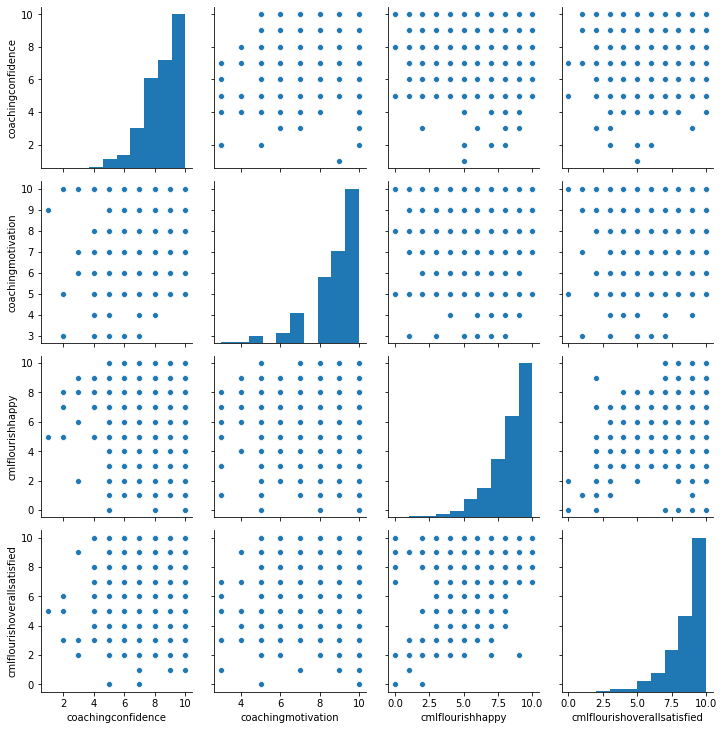

In [281]:
sns.pairplot(small_survey)

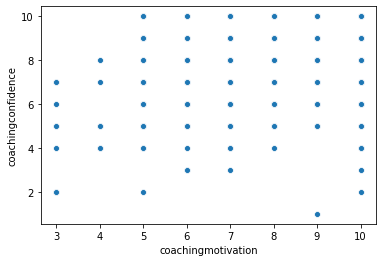

In [282]:
sns.scatterplot(x='coachingmotivation', y='coachingconfidence', data=small_survey)

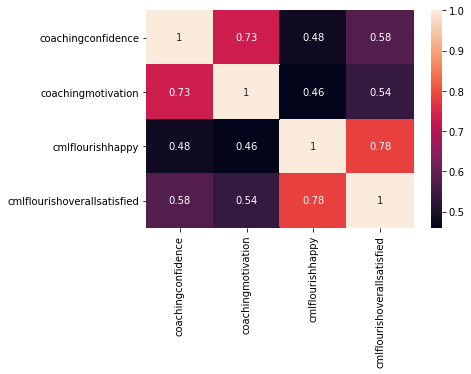

In [283]:

correlation_mat = small_survey.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

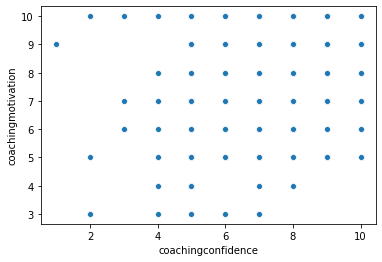

In [284]:
sns.scatterplot(x='coachingconfidence', y='coachingmotivation', data=small_survey)

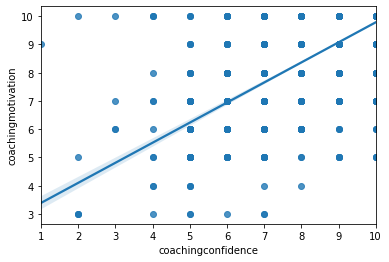

In [285]:
sns.regplot(x='coachingconfidence', y='coachingmotivation', data=small_survey)

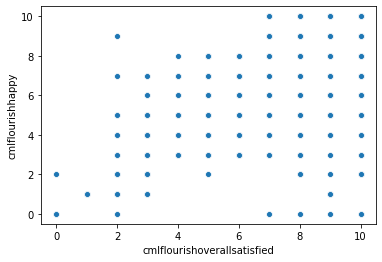

In [286]:
sns.scatterplot(x='cmlflourishoverallsatisfied', y='cmlflourishhappy', data=small_survey)

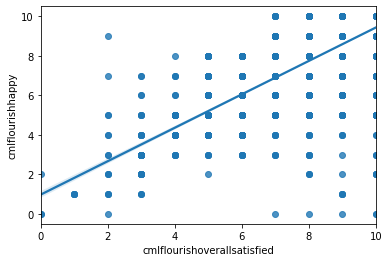

In [287]:
sns.regplot(x='cmlflourishoverallsatisfied', y='cmlflourishhappy', data=small_survey)

In [288]:
X= small_survey[['coachingconfidence']]
y= small_survey[['coachingmotivation']]

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(1756, 1) (1756, 1)
(3568, 1) (3568, 1)


In [331]:
model = linear_model.LinearRegression(normalize=True)

In [332]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [333]:
print(model.score(X_train, y_train))

0.633405333839929


In [334]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'predicted motivation score')

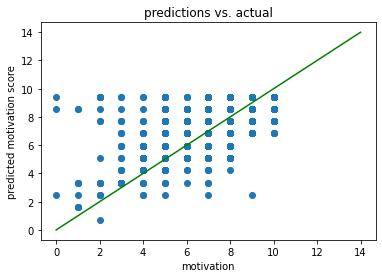

In [335]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='green')
plt.title("predictions vs. actual")
plt.xlabel('motivation')
plt.ylabel('predicted motivation score')

In [336]:
#Multiple Linear Regression using OLS
X = small_survey.drop(["coachingmotivation"],axis=1)
X = sm.add_constant(X)

In [337]:
y= small_survey[['coachingmotivation']]

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)

In [339]:
multiple_variables = sm.OLS(y_train, X_train)
mv_results = multiple_variables.fit()

In [340]:
mv_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     coachingmotivation   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     758.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          3.96e-316
Time:                        13:20:00   Log-Likelihood:                -2128.0
No. Observations:                1756   AIC:                             4264.
Df Residuals:                    1752   BIC:                             4286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.3622      0.139     16.991      0.000       2.090       2.635
coachingconfidence              0.6196      0.018     33.950      0.000       0.584       0.655
cmlflourishhappy                0.0268      0.019      1.422      0.155      -0.010       0.064
cmlflourishoverallsatisfied     0.1083      0.022      4.954      0.000       0.065       0.151
==============================================================================
Omnibus:                      143.473   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.925
Skew:                          -0.248   Prob(JB):                    5.48e-141
Kurtosis:                       5.930   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
y_pred = mv_results.predict(X_test)

Text(0, 0.5, 'Predicted')

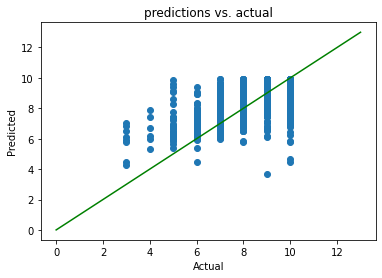

In [342]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,14)],[x for x in range(0,14)], color='green')
plt.title("predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [348]:
X= small_survey[['cmlflourishoverallsatisfied']]
y= small_survey[['cmlflourishhappy']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(1756, 1) (1756, 1)
(3568, 1) (3568, 1)


In [349]:
model2 = linear_model.LinearRegression(normalize=True)

In [350]:
model2.fit(X_train, y_train)

LinearRegression(normalize=True)

In [351]:
print(model2.score(X_train, y_train))

0.633405333839929


In [352]:
y_pred = model2.predict(X_test)

Text(0.5, 1.0, 'predictions vs. actual')

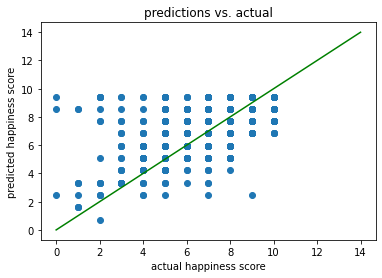

In [354]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='green')
plt.xlabel('actual happiness score')
plt.ylabel('predicted happiness score')
plt.title("predictions vs. actual")


In [308]:
alignment = survey [['coachinghabitsgoalsalignment','coachingmotivation', 'coachingconfidence' ]]

In [309]:
alignment.corr()

,coachingmotivation,coachingconfidence
coachingmotivation,1.000000,0.733049
coachingconfidence,0.733049,1.000000


In [310]:
#creating baseline measurement using the training model 
y_pred = y_train.mean()
y_pred

cmlflourishhappy    7.940774
dtype: float64

In [311]:
#prediction for training baseline data 
y_pred2= [y_pred] * len(y_train)
y_pred2

[cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishhappy    7.940774
 dtype: float64,
 cmlflourishh

In [312]:
#error for training baseline data
mean_abs_error = mean_absolute_error(y_train, y_pred2)
mean_abs_error

1.2742902952973472

In [313]:
#mean squared error for training baseline data 
mean_sqr= mean_squared_error(y_train, y_pred2)
mean_sqr

2.906515117709019

In [314]:
#creating baseline measurement using the testing model
y_pred = y_test.mean()
y_pred

cmlflourishhappy    7.993274
dtype: float64

In [315]:
#prediction for test baseline data 
y_pred3= [y_pred] * len(y_test)
y_pred3

[cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishhappy    7.993274
 dtype: float64,
 cmlflourishh

In [316]:
#error for test baseline data
mae = mean_absolute_error(y_test, y_pred3)
mae

1.2362479639646888

In [317]:
#mean squared error for test baseline data 
mse= mean_squared_error(y_test, y_pred3)
mse

2.7510758310040417

In [318]:
programs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   External Participant Id     2907 non-null   object
 1   Goal Record ID              2922 non-null   object
 2   Overall Goal Status         2922 non-null   object
 3   Total Engagement            2922 non-null   int64 
 4   Total Received Engagements  2922 non-null   int64 
 5   Program: Program Name       2922 non-null   object
 6   Start Date                  2922 non-null   object
 7   Coach Mentor                2283 non-null   object
dtypes: int64(2), object(6)
memory usage: 182.8+ KB


In [319]:
programs.head()

,External Participant Id,Goal Record ID,Overall Goal Status,Total Engagement,Total Received Engagements,Program: Program Name,Start Date,Coach Mentor
0,dc5898f5-cec4-40a4-a70f-150590bdbfaf,20210405-2071006,Partially Complete,5,2,ABB 2021,4/5/21,Coach Christine T.
1,80e4b9b6-ea73-40ed-8984-a19c3df348de,20210317-2062241,Dismissed,1,0,ABB 2021,3/17/21,Coach Karl M.
2,3fbf7076-a235-495f-9542-0f3b26f81482,20210326-2065731,Partially Complete,5,3,ABB 2021,3/26/21,Coach Ramona F.
3,38baff43-13bf-49e6-a003-861c3c9336e5,20210112-2016883,Dismissed,1,0,ABB 2021,1/12/21,Coach Karl M.
4,141749cb-3782-4e22-9649-e691c94023b6,20210323-2064436,In Progress,5,4,ABB 2021,3/23/21,Coach Ramona F.


In [320]:
programs.columns = programs.columns.str.lower()
programs.columns = programs.columns.str.replace(" ","_")

In [321]:
program_name = pd.merge(survey, programs)

In [322]:
program_name.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,...,confidencedifference,motivationdifference,completion_time,goal_record_id,overall_goal_status,total_engagement,total_received_engagements,program:_program_name,start_date,coach_mentor
0,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,...,1.0,0.0,00:02:18,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
1,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,...,-2.0,-1.0,00:01:16,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-01 12:25:31,2021-03-01 12:26:52,7.0,...,0.0,2.0,00:01:21,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
3,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-06 03:28:09,2021-03-06 03:30:02,7.0,...,-2.0,-2.0,00:01:53,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
4,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,NaN,2021-03-18 19:34:26,2021-03-18 19:35:54,9.0,...,NaN,NaN,00:01:28,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.


In [323]:
program_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6110 entries, 0 to 6109
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     6110 non-null   int64          
 1   survey_title                  6110 non-null   object         
 2   status                        6110 non-null   int64          
 3   publish_id                    6110 non-null   int64          
 4   contact_id                    6110 non-null   object         
 5   external_participant_id       6110 non-null   object         
 6   employer_id                   1855 non-null   object         
 7   start_date_time_stamp         6110 non-null   datetime64[ns] 
 8   end_date_time_stamp           6110 non-null   datetime64[ns] 
 9   coachingconfidence            6110 non-null   float64        
 10  coachingmotivation            6110 non-null   float64        
 11  cmlflourishoveral

In [324]:
program_name['status'].value_counts()

1    6110
Name: status, dtype: int64

In [325]:
program_name = program_name.drop(program_name[program_name.status == 'Incomplete'].index)

/Users/danielle.arneson/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [326]:
program_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6110 entries, 0 to 6109
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     6110 non-null   int64          
 1   survey_title                  6110 non-null   object         
 2   status                        6110 non-null   int64          
 3   publish_id                    6110 non-null   int64          
 4   contact_id                    6110 non-null   object         
 5   external_participant_id       6110 non-null   object         
 6   employer_id                   1855 non-null   object         
 7   start_date_time_stamp         6110 non-null   datetime64[ns] 
 8   end_date_time_stamp           6110 non-null   datetime64[ns] 
 9   coachingconfidence            6110 non-null   float64        
 10  coachingmotivation            6110 non-null   float64        
 11  cmlflourishoveral

In [327]:
#cleaning joined dataset 
program_name.columns = program_name.columns.str.lower()
program_name.columns = program_name.columns.str.replace(" ","_")
program_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6110 entries, 0 to 6109
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     6110 non-null   int64          
 1   survey_title                  6110 non-null   object         
 2   status                        6110 non-null   int64          
 3   publish_id                    6110 non-null   int64          
 4   contact_id                    6110 non-null   object         
 5   external_participant_id       6110 non-null   object         
 6   employer_id                   1855 non-null   object         
 7   start_date_time_stamp         6110 non-null   datetime64[ns] 
 8   end_date_time_stamp           6110 non-null   datetime64[ns] 
 9   coachingconfidence            6110 non-null   float64        
 10  coachingmotivation            6110 non-null   float64        
 11  cmlflourishoveral

In [328]:
program_name.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,...,confidencedifference,motivationdifference,completion_time,goal_record_id,overall_goal_status,total_engagement,total_received_engagements,program:_program_name,start_date,coach_mentor
0,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,...,1.0,0.0,00:02:18,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
1,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,...,-2.0,-1.0,00:01:16,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-01 12:25:31,2021-03-01 12:26:52,7.0,...,0.0,2.0,00:01:21,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
3,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-06 03:28:09,2021-03-06 03:30:02,7.0,...,-2.0,-2.0,00:01:53,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
4,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,NaN,2021-03-18 19:34:26,2021-03-18 19:35:54,9.0,...,NaN,NaN,00:01:28,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.


In [224]:
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Coach Danielle A.'].index)
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Coach Jennifer F.'].index)
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Coach Janssen J.'].index)
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Group Coach Mentor'].index)
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Coach Morgan T.'].index)
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Other'].index)

In [225]:
program_name['coach_mentor'].value_counts()

Coach Jaxon S.        690
Coach Karl M.         648
Coach Ramona F.       638
Coach Kenzie B.       503
Coach Christine T.    503
Coach Briana W.       392
Coach Elyse D.        391
Coach Ari. D          343
Coach Atalie F.       304
Coach Sean M.         253
Coach Jyotica B.      237
Coach Erika K.        104
Coach Maya M.          86
Coach Yana E.          60
Coach Maia K.           8
Name: coach_mentor, dtype: int64

In [133]:
program_name.columns

Index(['survey_id', 'survey_title', 'status', 'publish_id', 'contact_id',
       'external_participant_id', 'employer_id', 'start_date_time_stamp',
       'end_date_time_stamp', 'coachingconfidence', 'coachingmotivation',
       'cmlflourishoverallsatisfied', 'cmlflourishhappy',
       'coachinghabitsgoalsalignment', 'coachingsatisfaction',
       'coachingfeedback', 'confidencedifference', 'motivationdifference',
       'completion_time', 'goal_record_id', 'overall_goal_status',
       'total_engagement', 'total_received_engagements',
       'program:_program_name', 'start_date', 'coach_mentor'],
      dtype='object')

In [134]:
program_name['program:_program_name'].unique()

array(['CCHMC 2020', 'TeamHealth 2021', 'Allegion 2021',
       'Southeastern Grocers 2021', 'Pingry School 2020/2021',
       'Vericast 2021', 'Dawn Foods 2021', 'Sprouts 2020',
       'Assurant 2021', 'McCain Foods 2021', 'APS 2021',
       'Ensemble Health (BSMH) 2021a', 'RaceTrac 2021', 'Suddath 2021',
       'BeWellWithinA 2021a', 'American Airlines 2020', 'Stryker 2021',
       'BIC 2021', 'Levi Strauss & Co. 2021', 'PSE 2021', 'ABB 2021',
       'Casey Family Programs 2021', 'TAI Wellness 2021',
       'LG&E and KU 2021', 'Honda 2021', 'UNC-HCS 2021',
       'Kindred Healthcare 2021', 'Kindred At Home 2021', 'EMC 2021',
       'Suddath 2018-19', 'Iowa Clinic 2021', 'BPM 2021', 'Maximus 2021',
       'Bayer 2021', 'NWM 2021', 'Board of Pensions 2021', 'Stryker 2015',
       'AWC 2021', 'Lehigh University 2020/2021', 'Ally Financial 2020',
       'Landstar 2021', 'BeWellWithinA 2020', 'LA Care 2021',
       'CBHA 2020/2021', 'Nu Skin 2021', 'CCMC 2020', 'Synopsys 2020',
       'Ba

In [135]:
program_name['program:_program_name'].value_counts()

CCHMC 2020                   549
Kindred Healthcare 2021      366
BeWellWithinA 2021a          338
Assurant 2021                263
Southeastern Grocers 2021    246
                            ... 
EAM CDCFC 2021                 1
Microsoft 2019                 1
Kindred At Home 2020           1
Vinson & Elkins 2021           1
ASICS 2020/2021                1
Name: program:_program_name, Length: 102, dtype: int64

In [136]:
program_name['coachinghabitsgoalsalignment'].unique()

array(['strongly_agree', 'neutral', 'agree', 'disagree',
       'strongly_disagree'], dtype=object)

In [172]:
program_name['coachinghabitsgoalsalignment'].replace('strongly_disagree','1',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('disagree','2',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('neutral','3',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('agree','4',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('strongly_agree','5',inplace=True)
program_name['coachinghabitsgoalsalignment'].unique()

array(['5', '3', '4', '2', '1'], dtype=object)

In [173]:
program_name['coachingsatisfaction'].replace('very_dissatisfied','1',inplace=True)
program_name['coachingsatisfaction'].replace('dissatisfied','2',inplace=True)
program_name['coachingsatisfaction'].replace('neutral','3',inplace=True)
program_name['coachingsatisfaction'].replace('satisfied','4',inplace=True)
program_name['coachingsatisfaction'].replace('very_satisfied','5',inplace=True)
program_name['coachingsatisfaction'].unique()

array(['5', '4', '3', '1', '2'], dtype=object)

In [174]:
active_programs = program_name.groupby(['program:_program_name']).mean()
active_programs.head()

,survey_id,status,publish_id,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,total_engagement,total_received_engagements
program:_program_name,,,,,,,,,,,
ABB 2021,1616.0,1.0,1616.0,9.264706,9.170588,8.964706,8.811765,-0.058824,-0.022059,5.664706,4.835294
APS 2021,1616.0,1.0,1616.0,9.097561,8.926829,8.780488,8.658537,0.066667,-0.133333,5.097561,3.951220
ASICS 2020/2021,1616.0,1.0,1616.0,10.000000,10.000000,7.000000,6.000000,NaN,NaN,2.000000,1.000000
AWC 2021,1616.0,1.0,1616.0,7.631579,7.631579,7.368421,7.368421,-0.071429,0.000000,5.526316,4.631579
Akin Gump 2021,1616.0,1.0,1616.0,9.200000,9.200000,9.700000,9.700000,-0.125000,-0.125000,6.000000,5.600000


In [175]:
active_programs.columns

Index(['survey_id', 'status', 'publish_id', 'coachingconfidence',
       'coachingmotivation', 'cmlflourishoverallsatisfied', 'cmlflourishhappy',
       'confidencedifference', 'motivationdifference', 'total_engagement',
       'total_received_engagements'],
      dtype='object')

In [140]:
#programs with highest average confidence score 
confidence = active_programs.sort_values(by=['coachingconfidence'], ascending=False)
confidence.head(50)

,survey_id,status,publish_id,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,total_engagement,total_received_engagements
program:_program_name,,,,,,,,,,,
Viasat 2020/2021,1616.0,1.0,1616.0,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000
MODEC/SOFEC 2021,1616.0,1.0,1616.0,10.000000,9.600000,10.000000,9.800000,0.000000,0.000000,8.000000,6.000000
ASICS 2020/2021,1616.0,1.0,1616.0,10.000000,10.000000,7.000000,6.000000,NaN,NaN,2.000000,1.000000
HHP Webb Insurance Agency 2020,1616.0,1.0,1616.0,10.000000,9.166667,10.000000,10.000000,0.000000,-0.400000,4.000000,4.000000
NERC 2021 Cancelled,1616.0,1.0,1616.0,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,0.000000,0.000000
Sage 2021,1616.0,1.0,1616.0,10.000000,9.666667,9.000000,8.333333,0.000000,-0.500000,0.000000,0.000000
NERC 2021,1616.0,1.0,1616.0,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,2.500000,2.000000
Redwood 2021,1616.0,1.0,1616.0,10.000000,10.000000,8.000000,8.000000,0.000000,0.000000,1.000000,1.000000
CCMC 2021,1616.0,1.0,1616.0,10.000000,10.000000,8.000000,8.666667,0.000000,0.000000,7.000000,5.000000


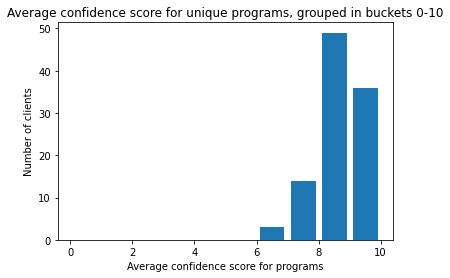

In [141]:
cc= confidence['coachingconfidence']
bins= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.hist(cc, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Average confidence score for programs')
plt.ylabel('Number of clients')
plt.title('Average confidence score for unique programs, grouped in buckets 0-10')
plt.show()

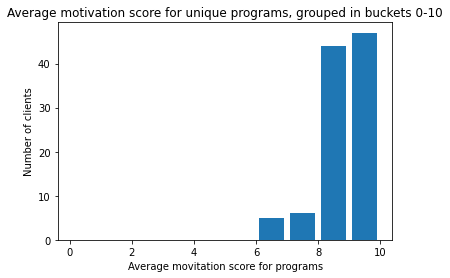

In [142]:
cm= confidence['coachingmotivation']
bins= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.hist(cm, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Average movitation score for programs')
plt.ylabel('Number of clients')
plt.title('Average motivation score for unique programs, grouped in buckets 0-10')
plt.show()

In [143]:
top_clients = active_programs.sort_values(by=['total_engagement'], ascending=False)
top_clients.head(50)

,survey_id,status,publish_id,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,total_engagement,total_received_engagements
program:_program_name,,,,,,,,,,,
MODEC/SOFEC 2021,1616.0,1.0,1616.0,10.000000,9.600000,10.000000,9.800000,0.000000,0.000000,8.000000,6.000000
CCMC 2020,1616.0,1.0,1616.0,6.285714,6.357143,5.642857,5.428571,-0.230769,-0.230769,7.333333,6.000000
CCMC 2021,1616.0,1.0,1616.0,10.000000,10.000000,8.000000,8.666667,0.000000,0.000000,7.000000,5.000000
CME Group 2020/2021,1616.0,1.0,1616.0,7.800000,8.000000,7.200000,8.000000,-0.333333,-0.666667,6.600000,2.600000
Landstar 2021,1616.0,1.0,1616.0,9.097561,9.121951,8.707317,8.512195,0.085714,0.028571,6.585366,5.195122
Lehigh University 2020/2021,1616.0,1.0,1616.0,8.387097,8.548387,8.096774,7.709677,0.000000,0.041667,6.483871,3.193548
EAM DFYF 2020,1616.0,1.0,1616.0,8.800000,9.800000,9.000000,8.800000,0.250000,0.000000,6.000000,5.000000
Akin Gump 2021,1616.0,1.0,1616.0,9.200000,9.200000,9.700000,9.700000,-0.125000,-0.125000,6.000000,5.600000
UBC 2021,1616.0,1.0,1616.0,9.166667,9.357143,6.500000,6.000000,-0.090909,0.030303,5.952381,4.738095


In [144]:
top_clients=top_clients.head(10)
top_clients.reset_index()
top_clients.columns

Index(['survey_id', 'status', 'publish_id', 'coachingconfidence',
       'coachingmotivation', 'cmlflourishoverallsatisfied', 'cmlflourishhappy',
       'confidencedifference', 'motivationdifference', 'total_engagement',
       'total_received_engagements'],
      dtype='object')

In [149]:
confidence_count = confidence.groupby('coachingconfidence').count()
confidence_count.head(50)
                    

,survey_id,status,publish_id,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,total_engagement,total_received_engagements
coachingconfidence,,,,,,,,,,
6.000000,1,1,1,1,1,1,0,0,1,1
6.285714,1,1,1,1,1,1,1,1,1,1
6.666667,1,1,1,1,1,1,1,1,1,1
7.000000,3,3,3,3,3,3,2,2,3,3
7.333333,1,1,1,1,1,1,1,1,1,1
7.500000,1,1,1,1,1,1,1,1,1,1
7.571429,1,1,1,1,1,1,1,1,1,1
7.600000,1,1,1,1,1,1,1,1,1,1
7.631579,1,1,1,1,1,1,1,1,1,1


In [150]:
#progams will hightest average motivation
motivation = active_programs.sort_values(by=['coachingmotivation'], ascending=False)
motivation.head(50)

,survey_id,status,publish_id,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,total_engagement,total_received_engagements
program:_program_name,,,,,,,,,,,
McCain Foods 2021,1616.0,1.0,1616.0,9.916667,10.000000,9.583333,9.166667,-0.111111,0.000000,5.416667,4.750000
Redwood 2021,1616.0,1.0,1616.0,10.000000,10.000000,8.000000,8.000000,0.000000,0.000000,1.000000,1.000000
ASICS 2020/2021,1616.0,1.0,1616.0,10.000000,10.000000,7.000000,6.000000,NaN,NaN,2.000000,1.000000
Vinson & Elkins 2021,1616.0,1.0,1616.0,9.000000,10.000000,7.000000,8.000000,NaN,NaN,0.000000,0.000000
NERC 2021,1616.0,1.0,1616.0,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,2.500000,2.000000
NERC 2021 Cancelled,1616.0,1.0,1616.0,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,0.000000,0.000000
CCMC 2021,1616.0,1.0,1616.0,10.000000,10.000000,8.000000,8.666667,0.000000,0.000000,7.000000,5.000000
Viasat 2020/2021,1616.0,1.0,1616.0,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000
EAM DFYF 2020,1616.0,1.0,1616.0,8.800000,9.800000,9.000000,8.800000,0.250000,0.000000,6.000000,5.000000


In [151]:
program_name['overall_goal_status'].unique()

array(['Complete', 'No Action', 'Dismissed', 'Partially Complete',
       'In Progress', 'Rollover', 'Registration Phase'], dtype=object)

In [152]:
program_name = program_name.drop(program_name[program_name.overall_goal_status == 'No Action'].index)
program_name = program_name.drop(program_name[program_name.overall_goal_status == 'Registration Phase'].index)

In [153]:
goal_status = program_name.groupby(['overall_goal_status']).mean()
goal_status.head()

,survey_id,status,publish_id,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,total_engagement,total_received_engagements
overall_goal_status,,,,,,,,,,,
Complete,1616.0,1.0,1616.0,8.759533,8.901167,8.307004,8.055253,-0.008776,-0.005081,6.612062,6.055253
Dismissed,1616.0,1.0,1616.0,8.768496,8.902148,8.091885,7.822196,-0.004149,0.018672,3.582339,2.280430
In Progress,1616.0,1.0,1616.0,8.712510,8.888112,8.138306,7.772339,0.006243,-0.046826,3.836053,2.885781
Partially Complete,1616.0,1.0,1616.0,8.722736,8.776340,8.242144,7.953789,0.045333,-0.016000,3.807763,2.336414
Rollover,1616.0,1.0,1616.0,7.733333,7.800000,7.733333,6.866667,0.083333,0.000000,0.000000,0.000000


In [154]:
goal_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Complete to Rollover
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   survey_id                    5 non-null      float64
 1   status                       5 non-null      float64
 2   publish_id                   5 non-null      float64
 3   coachingconfidence           5 non-null      float64
 4   coachingmotivation           5 non-null      float64
 5   cmlflourishoverallsatisfied  5 non-null      float64
 6   cmlflourishhappy             5 non-null      float64
 7   confidencedifference         5 non-null      float64
 8   motivationdifference         5 non-null      float64
 9   total_engagement             5 non-null      float64
 10  total_received_engagements   5 non-null      float64
dtypes: float64(11)
memory usage: 480.0+ bytes


In [155]:
goal_status.index.names

FrozenList(['overall_goal_status'])

In [157]:
goal_status.reset_index(inplace=True)

In [158]:
print(goal_status.columns.tolist())

['overall_goal_status', 'survey_id', 'status', 'publish_id', 'coachingconfidence', 'coachingmotivation', 'cmlflourishoverallsatisfied', 'cmlflourishhappy', 'confidencedifference', 'motivationdifference', 'total_engagement', 'total_received_engagements']


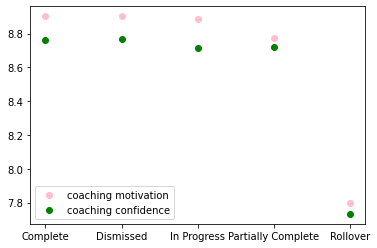

In [170]:
g = goal_status['overall_goal_status']
gc =goal_status['coachingconfidence']
gm= goal_status['coachingmotivation']
plt.scatter(g,gm, color ='pink', label= 'coaching motivation')
plt.scatter(g,gc, color='green', label='coaching confidence')
plt.legend()
plt.show()

In [200]:
alignement= program_name[['coachinghabitsgoalsalignment', 'coachingmotivation', 'coachingconfidence']]
alignment

,coachinghabitsgoalsalignment,level_0,index,coachingmotivation,coachingconfidence
0,agree,0,0,8.849287,8.659878
1,disagree,1,1,8.000000,7.907834
2,neutral,2,2,8.120000,7.998400
3,strongly_agree,3,3,9.538168,9.472519
4,strongly_disagree,4,4,7.857143,7.904762


In [201]:
alignment = alignment.groupby('coachinghabitsgoalsalignment').mean()
alignment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, agree to strongly_disagree
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   level_0             5 non-null      int64  
 1   index               5 non-null      int64  
 2   coachingmotivation  5 non-null      float64
 3   coachingconfidence  5 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 200.0+ bytes


In [202]:
alignment.index.names

FrozenList(['coachinghabitsgoalsalignment'])

In [203]:
alignment.reset_index(inplace=True)
alignment.index.names

FrozenList([None])

In [198]:
alignment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   coachinghabitsgoalsalignment  5 non-null      object 
 1   level_0                       5 non-null      int64  
 2   index                         5 non-null      int64  
 3   coachingmotivation            5 non-null      float64
 4   coachingconfidence            5 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 328.0+ bytes


In [208]:
alignment=alignment[['coachinghabitsgoalsalignment', 'coachingmotivation', 'coachingconfidence']]
alignment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   coachinghabitsgoalsalignment  5 non-null      object 
 1   coachingmotivation            5 non-null      float64
 2   coachingconfidence            5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


In [216]:
alignment['coachinghabitsgoalsalignment'].replace('strongly_disagree','s_disagree',inplace=True)
alignment['coachinghabitsgoalsalignment'].replace('strongly_agree','s_agree',inplace=True)

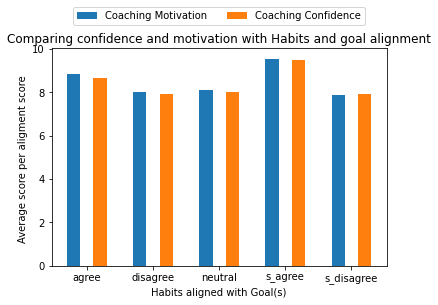

In [217]:
x= alignment['coachingmotivation']
y=alignment['coachingconfidence']
z= alignment['coachinghabitsgoalsalignment']

X_axis = np.arange(len(z))
  
plt.bar(X_axis - 0.2, x, 0.2, label = 'Coaching Motivation')
plt.bar(X_axis + 0.2, y, 0.2, label = 'Coaching Confidence')
  
plt.xticks(X_axis, z)
plt.xlabel("Habits aligned with Goal(s)")
plt.ylabel("Average score per aligment score ")
plt.title("Comparing confidence and motivation with Habits and goal alignment")
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

In [219]:
coaches = program_name[['coachinghabitsgoalsalignment', 'coachingmotivation', 'coachingconfidence','coach_mentor','confidencedifference', 'motivationdifference']]

In [355]:
coaches['coachinghabitsgoalsalignment'].replace('strongly_disagree','1',inplace=True)
coaches['coachinghabitsgoalsalignment'].replace('disagree','2',inplace=True)
coaches['coachinghabitsgoalsalignment'].replace('neutral','3',inplace=True)
coaches['coachinghabitsgoalsalignment'].replace('agree','4',inplace=True)
coaches['coachinghabitsgoalsalignment'].replace('strongly_agree','5',inplace=True)
coaches['coachinghabitsgoalsalignment'].unique()

array(['5', '3', '4', '2', '1'], dtype=object)

In [356]:
hga = coaches.groupby('coach_mentor').mean()
hga

,coachingmotivation,coachingconfidence,confidencedifference,motivationdifference
coach_mentor,,,,
Coach Ari. D,8.947522,8.804665,-0.012245,0.004082
Coach Atalie F.,8.927632,8.628289,-0.026201,0.000000
Coach Briana W.,8.971939,8.992347,-0.003289,-0.052632
Coach Christine T.,8.992048,8.787276,0.005291,0.026455
Coach Elyse D.,9.023018,8.941176,-0.003236,0.025890
Coach Erika K.,9.182692,8.961538,-0.049383,-0.061728
Coach Janssen J.,10.000000,10.000000,NaN,NaN
Coach Jaxon S.,8.868116,8.775362,0.034417,-0.017208
Coach Jennifer F.,9.850000,9.800000,0.018868,0.075472
